In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('texas_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_deaths_2_lag', 'new_deaths_50_lag', 'new_cases_2_lag', 'dew_point', 'relative_humidity', 'new_cases_150_lag', 'current_intensive_care_patients', 'new_deaths_3_lag', 'new_cases_3_lag', 'new_deaths_100_std', 'new_deaths_4_lag', 'average_temperature_celsius', 'new_deaths_30_lag', 'new_cases_10_min', 'new_cases_7_lag', 'new_cases_4_lag', 'new_deaths_1_lag', 'new_cases_50_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_7_lag', 'new_cases_10_mean', 'new_hospitalized_patients', 'new_cases_10_max', 'new_cases_1 lag']]
covid_test = covid_test[['y', 'new_deaths_2_lag', 'new_deaths_50_lag', 'new_cases_2_lag', 'dew_point', 'relative_humidity', 'new_cases_150_lag', 'current_intensive_care_patients', 'new_deaths_3_lag', 'new_cases_3_lag', 'new_deaths_100_std', 'new_deaths_4_lag', 'average_temperature_celsius', 'new_deaths_30_lag', 'new_cases_10_min', 'new_cases_7_lag', 'new_cases_4_lag', 'new_deaths_1_lag', 'new_cases_50_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_7_lag', 'new_cases_10_mean', 'new_hospitalized_patients', 'new_cases_10_max', 'new_cases_1 lag']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:9756.14378	validation_1-rmse:31684.66734
[1]	validation_0-rmse:9671.24188	validation_1-rmse:31596.77882
[2]	validation_0-rmse:9587.23131	validation_1-rmse:31509.92702
[3]	validation_0-rmse:9504.09684	validation_1-rmse:31424.08352
[4]	validation_0-rmse:9421.84215	validation_1-rmse:31341.90647
[5]	validation_0-rmse:9340.44911	validation_1-rmse:31257.71115
[6]	validation_0-rmse:9259.90784	validation_1-rmse:31174.45071
[7]	validation_0-rmse:9180.21717	validation_1-rmse:31095.08953
[8]	validation_0-rmse:9101.31775	validation_1-rmse:30991.89910
[9]	validation_0-rmse:9023.23468	validation_1-rmse:30909.53451
[10]	validation_0-rmse:8945.95250	validation_1-rmse:30808.50607
[11]	validation_0-rmse:8869.52308	validation_1-rmse:30728.17289
[12]	validation_0-rmse:8793.68310	validation_1-rmse:30664.05885
[13]	validation_0-rmse:8718.62673	validation_1-rmse:30600.49866
[14]	validation_0-rmse:8643.98070	validation_1-rmse:30540.94516
[15]	validation_0-rmse:8570.11513	validation_1-rms

[128]	validation_0-rmse:3536.47129	validation_1-rmse:24619.85243
[129]	validation_0-rmse:3511.11115	validation_1-rmse:24568.76066
[130]	validation_0-rmse:3486.33644	validation_1-rmse:24529.61130
[131]	validation_0-rmse:3462.14771	validation_1-rmse:24489.95205
[132]	validation_0-rmse:3438.17093	validation_1-rmse:24452.42660
[133]	validation_0-rmse:3414.29494	validation_1-rmse:24414.30399
[134]	validation_0-rmse:3390.48460	validation_1-rmse:24383.20152
[135]	validation_0-rmse:3367.08794	validation_1-rmse:24345.71196
[136]	validation_0-rmse:3343.58792	validation_1-rmse:24308.24877
[137]	validation_0-rmse:3319.99132	validation_1-rmse:24278.43645
[138]	validation_0-rmse:3297.24068	validation_1-rmse:24240.76401
[139]	validation_0-rmse:3274.71667	validation_1-rmse:24204.40819
[140]	validation_0-rmse:3252.67770	validation_1-rmse:24167.62837
[141]	validation_0-rmse:3230.27317	validation_1-rmse:24131.12843
[142]	validation_0-rmse:3208.08947	validation_1-rmse:24119.57612
[143]	validation_0-rmse:3

[255]	validation_0-rmse:1617.53664	validation_1-rmse:22002.24657
[256]	validation_0-rmse:1609.22088	validation_1-rmse:21995.35460
[257]	validation_0-rmse:1600.72370	validation_1-rmse:21984.03403
[258]	validation_0-rmse:1592.52387	validation_1-rmse:21965.09930
[259]	validation_0-rmse:1584.38718	validation_1-rmse:21956.91109
[260]	validation_0-rmse:1576.26363	validation_1-rmse:21937.48944
[261]	validation_0-rmse:1567.92650	validation_1-rmse:21926.02771
[262]	validation_0-rmse:1559.95950	validation_1-rmse:21917.57572
[263]	validation_0-rmse:1551.96282	validation_1-rmse:21898.55731
[264]	validation_0-rmse:1543.83905	validation_1-rmse:21887.20616
[265]	validation_0-rmse:1536.00671	validation_1-rmse:21879.26782
[266]	validation_0-rmse:1528.16743	validation_1-rmse:21860.59802
[267]	validation_0-rmse:1520.24185	validation_1-rmse:21849.46045
[268]	validation_0-rmse:1512.56785	validation_1-rmse:21842.01885
[269]	validation_0-rmse:1504.70091	validation_1-rmse:21831.15008
[270]	validation_0-rmse:1

[382]	validation_0-rmse:891.15792	validation_1-rmse:20628.21438
[383]	validation_0-rmse:887.81323	validation_1-rmse:20621.59294
[384]	validation_0-rmse:884.53640	validation_1-rmse:20614.32988
[385]	validation_0-rmse:881.14726	validation_1-rmse:20607.81168
[386]	validation_0-rmse:877.66581	validation_1-rmse:20601.53636
[387]	validation_0-rmse:874.20887	validation_1-rmse:20596.05806
[388]	validation_0-rmse:871.01567	validation_1-rmse:20589.68474
[389]	validation_0-rmse:867.74955	validation_1-rmse:20583.39528
[390]	validation_0-rmse:864.36947	validation_1-rmse:20577.28584
[391]	validation_0-rmse:861.13811	validation_1-rmse:20571.97270
[392]	validation_0-rmse:857.62018	validation_1-rmse:20565.91195
[393]	validation_0-rmse:854.46666	validation_1-rmse:20559.81789
[394]	validation_0-rmse:851.01667	validation_1-rmse:20553.82547
[395]	validation_0-rmse:847.92586	validation_1-rmse:20547.79781
[396]	validation_0-rmse:844.97125	validation_1-rmse:20541.78966
[397]	validation_0-rmse:841.94913	valida

[511]	validation_0-rmse:613.73603	validation_1-rmse:20058.47570
[512]	validation_0-rmse:612.14959	validation_1-rmse:20056.52239
[513]	validation_0-rmse:610.58428	validation_1-rmse:20054.58441
[514]	validation_0-rmse:608.48340	validation_1-rmse:20051.15686
[515]	validation_0-rmse:606.94867	validation_1-rmse:20049.24753
[516]	validation_0-rmse:604.87665	validation_1-rmse:20045.86169
[517]	validation_0-rmse:603.90964	validation_1-rmse:20043.18286
[518]	validation_0-rmse:602.81428	validation_1-rmse:20039.94835
[519]	validation_0-rmse:601.32336	validation_1-rmse:20038.09111
[520]	validation_0-rmse:599.19535	validation_1-rmse:20034.85753
[521]	validation_0-rmse:597.29004	validation_1-rmse:20033.46344
[522]	validation_0-rmse:596.47287	validation_1-rmse:20030.72368
[523]	validation_0-rmse:594.48934	validation_1-rmse:20027.49584
[524]	validation_0-rmse:593.68984	validation_1-rmse:20024.82031
[525]	validation_0-rmse:591.83474	validation_1-rmse:20023.46725
[526]	validation_0-rmse:590.94945	valida

[640]	validation_0-rmse:462.16064	validation_1-rmse:19853.92941
[641]	validation_0-rmse:461.85603	validation_1-rmse:19852.32398
[642]	validation_0-rmse:460.75138	validation_1-rmse:19851.92389
[643]	validation_0-rmse:460.45154	validation_1-rmse:19850.33463
[644]	validation_0-rmse:459.26113	validation_1-rmse:19848.72159
[645]	validation_0-rmse:458.20163	validation_1-rmse:19848.83670
[646]	validation_0-rmse:457.86664	validation_1-rmse:19847.27351
[647]	validation_0-rmse:457.53639	validation_1-rmse:19845.72187
[648]	validation_0-rmse:456.37060	validation_1-rmse:19844.13631
[649]	validation_0-rmse:455.26245	validation_1-rmse:19843.47039
[650]	validation_0-rmse:454.25753	validation_1-rmse:19842.42735
[651]	validation_0-rmse:453.93544	validation_1-rmse:19840.90792
[652]	validation_0-rmse:453.06595	validation_1-rmse:19840.78480
[653]	validation_0-rmse:452.69116	validation_1-rmse:19839.26465
[654]	validation_0-rmse:451.71519	validation_1-rmse:19838.25451
[655]	validation_0-rmse:450.57833	valida

[769]	validation_0-rmse:369.50466	validation_1-rmse:19732.65041
[770]	validation_0-rmse:369.19632	validation_1-rmse:19731.19736
[771]	validation_0-rmse:368.73026	validation_1-rmse:19730.51292
[772]	validation_0-rmse:368.19572	validation_1-rmse:19730.17790
[773]	validation_0-rmse:367.61509	validation_1-rmse:19730.55890
[774]	validation_0-rmse:367.31318	validation_1-rmse:19729.11730
[775]	validation_0-rmse:367.02606	validation_1-rmse:19729.06126
[776]	validation_0-rmse:366.72912	validation_1-rmse:19727.62960
[777]	validation_0-rmse:366.48412	validation_1-rmse:19727.44843
[778]	validation_0-rmse:365.96745	validation_1-rmse:19727.14466
[779]	validation_0-rmse:365.67254	validation_1-rmse:19725.72111
[780]	validation_0-rmse:365.18473	validation_1-rmse:19725.80517
[781]	validation_0-rmse:364.91850	validation_1-rmse:19725.76945
[782]	validation_0-rmse:364.63000	validation_1-rmse:19724.35792
[783]	validation_0-rmse:364.35495	validation_1-rmse:19724.20142
[784]	validation_0-rmse:363.84578	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

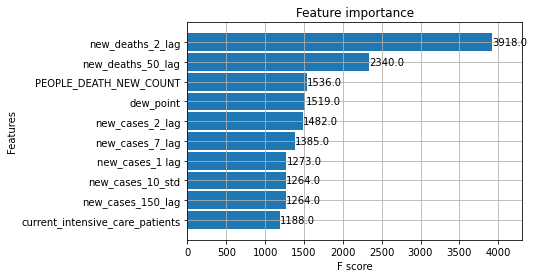

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

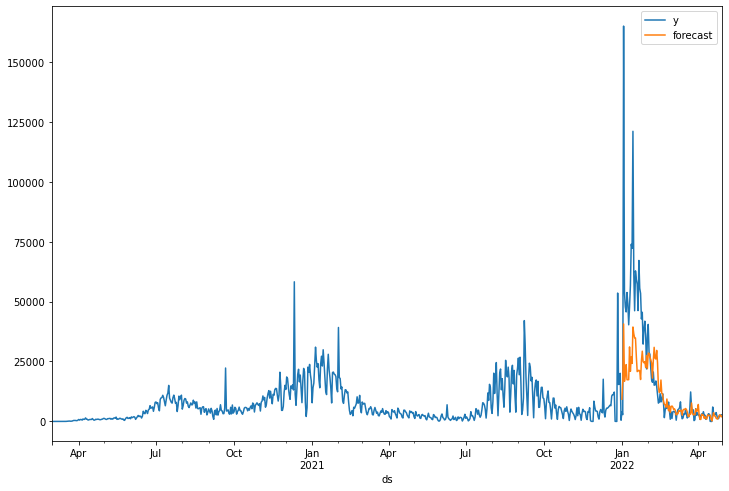

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

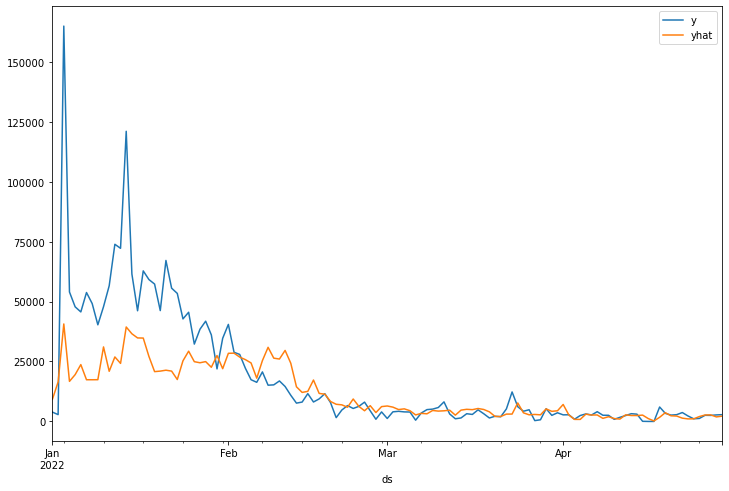

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  19682.714061491686
Test MAE:  9720.235055875377
MASE =  1.4590918634637893


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

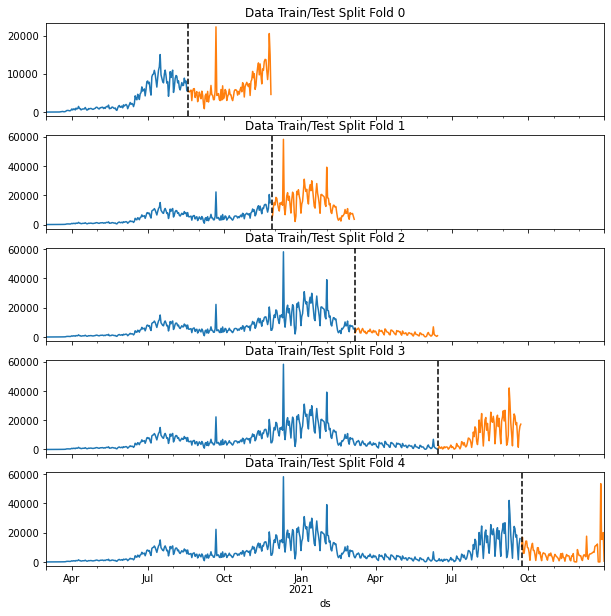

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[19:48:20] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9759.44703	validation_1-rmse:31652.41799
[100]	validation_0-rmse:4752.19101	validation_1-rmse:25009.90999
[200]	validation_0-rmse:3042.76304	validation_1-rmse:21932.45267
[300]	validation_0-rmse:2366.27266	validation_1-rmse:20603.15405
[400]	validation_0-rmse:2000.88950	validation_1-rmse:20433.69940
[500]	validation_0-rmse:1769.93106	validation_1-rmse:20276.41664
[554]	validation_0-rmse:1675.53460	validation_1-rmse:20243.43695
[19:48:21] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9759.44703	validation_1-rmse:31652.41799
[100]	validation_0-rmse:4752.19101	validation_1-rmse:25009.90999
[200]	validation_0-rmse:3042.76304	validation_1-rmse:21932.45267
[300

<AxesSubplot:xlabel='ds'>

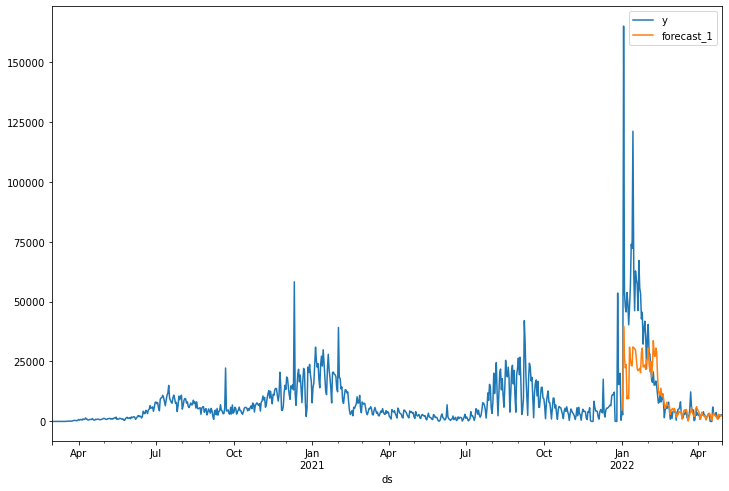

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

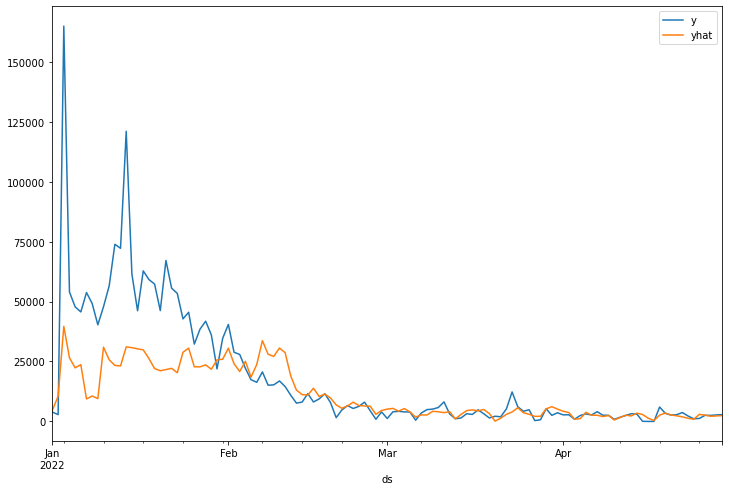

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  19682.714061491686
Test MAE:  9720.235055875377
MASE =  1.4590918634637893
